<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Simple_Dense_Neural_Network_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import reuters

Using TensorFlow backend.


In [0]:
vocabulary=7500 # we will only use the 7500 most frequently used words

Next block of code block has been commented out because it does not work anymore

In [0]:
# save np.load
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)

# restore np.load for future normal usage
#np.load = np_load_old

In [4]:
np.load.__defaults__=(None, True, True, 'ASCII')
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=vocabulary)
np.load.__defaults__=(None, False, True, 'ASCII')

2113536/2110848 [==============================] - 0s 0us/step


In the next line of code we will print the lists that contain sequences of words represented by a word index. If the text has not been converted to a sequence of indices we would need to add one pre-processing step using Tokenizer

In [5]:
print(train_data[1]) # train_data is a list of word sequences

[1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


Now we will vectorize the training and test data. Basically we will create a matrix where the rows are the reviews and where the columns represent the vocabulary (7500 columns). We will set a 1 in the correct column if the word of the review matches a word of the vocabulary. This means that matrix will be rather sparse.

In [0]:
def vectorize_sequences(sequences, dimension=vocabulary):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

Now we apply the function to our training and test data as well as the labels. 

In [0]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(vocabulary,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Validation Set

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val)) #history object contains training details - object has a member dictionary

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 238us/step - loss: 2.7237 - acc: 0.4463 - val_loss: 1.8616 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.5158 - acc: 0.7028 - val_loss: 1.3580 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.1100 - acc: 0.7701 - val_loss: 1.1708 - val_acc: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.8789 - acc: 0.8161 - val_loss: 1.0690 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.7131 - acc: 0.8497 - val_loss: 0.9755 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.5782 - acc: 0.8826 - val_loss: 0.9397 - val_acc: 0.7990
Epoch 7/20
7982/7982 [===================

In [0]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, 21)

<function matplotlib.pyplot.show>

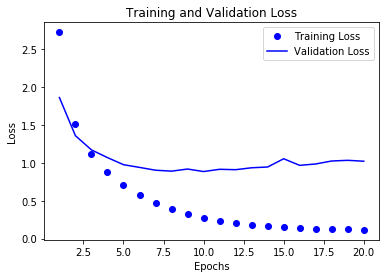

In [13]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss') #bo is for blue dotted line
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #b is for blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [16]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(vocabulary,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results=model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 166us/step - loss: 2.4783 - acc: 0.5447 - val_loss: 1.6462 - val_acc: 0.6490
Epoch 2/10
7982/7982 [==============================] - 1s 131us/step - loss: 1.3752 - acc: 0.7086 - val_loss: 1.2815 - val_acc: 0.7190
Epoch 3/10
7982/7982 [==============================] - 1s 125us/step - loss: 1.0482 - acc: 0.7740 - val_loss: 1.1377 - val_acc: 0.7480
Epoch 4/10
7982/7982 [==============================] - 1s 126us/step - loss: 0.8336 - acc: 0.8259 - val_loss: 1.0391 - val_acc: 0.7810
Epoch 5/10
7982/7982 [==============================] - 1s 126us/step - loss: 0.6799 - acc: 0.8578 - val_loss: 0.9792 - val_acc: 0.7940
Epoch 6/10
7982/7982 [==============================] - 1s 127us/step - loss: 0.5475 - acc: 0.8857 - val_loss: 0.9310 - val_acc: 0.8060
Epoch 7/10
7982/7982 [==============================] - 1s 128us/step - loss: 0.4470 - acc: 0.9085 - val_loss: 0.9114 - val_acc: 0.8070


In [17]:
print(results)

[1.0000779106483222, 0.790293855743544]
